<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
# Exploratory Data Analysis - Google Play Store

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 Most influenced category - Installs <br/>
    - 4.2 Which Genres have got better Ratings?<br/>
    - 4.3 What is the Genres vs Type Rating?<br/>
    - 4.4 Which are the Category which has paid more for the Apps ?<br/>
    - 4.5 Which are the Category which has paid more for the Apps ?<br/>
    - 4.6 Survival rate - Content Rating and Category?<br/>
   
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes
    
   Statement:
   
    Types of app to be launched by google playstore to be successful.
    
    Hypothesis: Highest installed apps will get more reviews.



<a id=section2></a>

## 2. Data Loading and Description

- The dataset consists of the information about the applications installed by user from Google Play Store. Various variables present in the dataset includes Android Version, Current Version, Caterory, Genres,etc. 
- The dataset has 10841 rows and 13 columns. Below is a table showing names of all the columns and their description.

##### Importing Packages

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing Data Set

In [2]:
googleplay_df = pd.read_csv('C:/Users/Abhai/Desktop/Google/googleplaystore.csv')

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [3]:
googleplay_df.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(10841, 13)

Google Play Store_data has __10841 rows__ and __13 columns.__

In [4]:
googleplay_df.columns                                            # This will print the names of all columns.

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'ContentRating', 'Genres', 'LastUpdated', 'CurrentVer',
       'AndroidVer'],
      dtype='object')

In [5]:
googleplay_df.head()                                             # This will print the first n rows of the Data Frame

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<a id=section301></a>

In [6]:
googleplay_df.tail()                                                   # This will print the last n rows of the Data Frame

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
googleplay_df.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App              10841 non-null object
Category         10841 non-null object
Rating           10841 non-null float64
Reviews          10841 non-null object
Size             10841 non-null object
Installs         10841 non-null object
Type             10841 non-null object
Price            10841 non-null object
ContentRating    10841 non-null object
Genres           10841 non-null object
LastUpdated      10841 non-null object
CurrentVer       10833 non-null object
AndroidVer       10839 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
googleplay_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
count,10841,10841,10841.000000,10841,10841,10841,10841,10841,10841,10841,10841,10833,10839
unique,9659,33,NaN,6002,462,21,2,92,7,120,1378,2784,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10041,10041,8714,842,326,1459,2452
mean,NaN,NaN,4.219777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.485162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
googleplay_df.isnull().sum()

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    0
Genres           0
LastUpdated      0
CurrentVer       8
AndroidVer       2
dtype: int64

From the above output we can see that __Current Ver__ and __Android Ver__ columns contains __min null values__. Which can be ignored.

<a id=section302></a>

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [10]:
googleplay_df_prof_rpt = pandas_profiling.ProfileReport(googleplay_df)
googleplay_df_prof_rpt

Number of variables,13
Number of observations,10841
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,104.0 B
Numeric,1
Categorical,12
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Here, we have done Pandas Profiling before preprocessing our dataset. <br/>
Now we will process our data to better understand it.

<a id=section303></a>

## 3.3 Post Pandas Profiling

In [11]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(googleplay_df)

## 4. Questions

### 4.1 Most influenced category - Installs ?

- Using Countplot

Text(0.5,1,'Count plot for Category.')

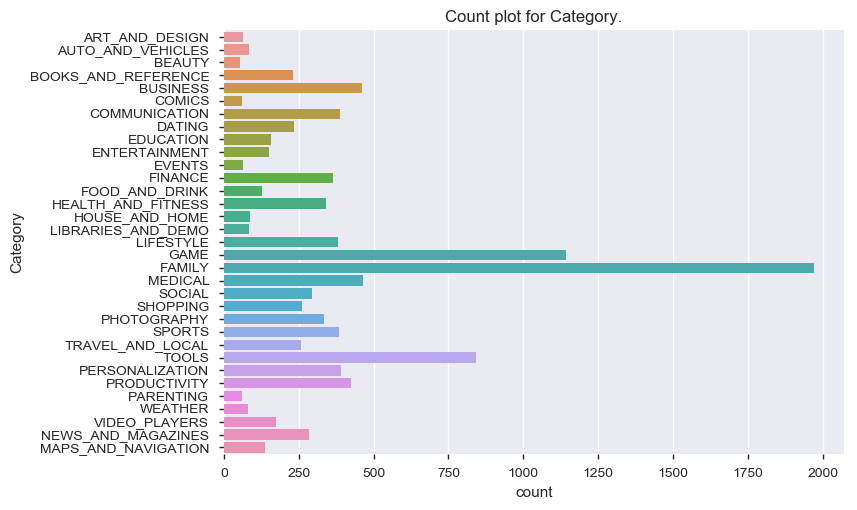

In [12]:
sns.countplot(y='Category', data=googleplay_df).set_title('Count plot for Category.')

Text(0.5,1,'Count plot for Type.')

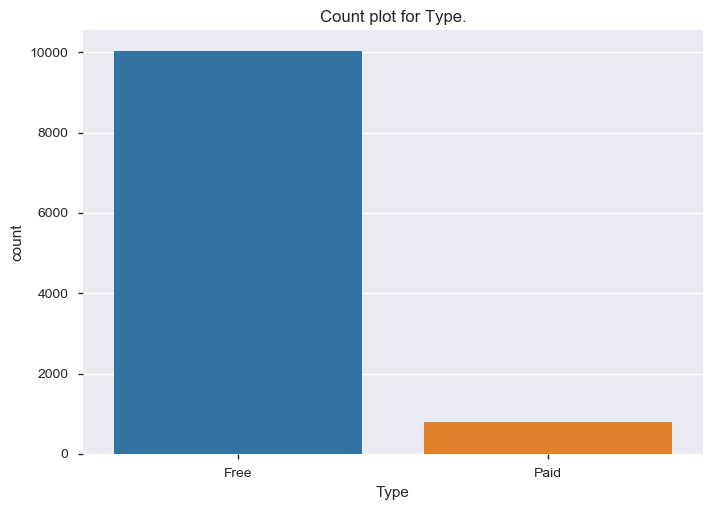

In [13]:
sns.countplot(x='Type', data=googleplay_df).set_title('Count plot for Type.')

You can see that more people install Free apps when compared to the Paid ones.

### 4.2 Which Genres have got better Ratings?

In [14]:
googleplay_df.groupby(['Genres','Rating'])['Genres'].count()

Genres                                 Rating
Action                                 3.1        1
                                       3.2        1
                                       3.3        2
                                       3.4        3
                                       3.5        3
                                       3.6        3
                                       3.7        7
                                       3.8        8
                                       3.9       14
                                       4.0       20
                                       4.1       27
                                       4.2       46
                                       4.3       57
                                       4.4       63
                                       4.5       49
                                       4.6       40
                                       4.7       20
                                       5.0        1
Action;Action & Ad

<a id=section403></a>

### 4.5. Which are the Category which has paid more for the Apps ?

In [15]:
googleplay_df.sort_values('Price').head(40)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
5260,AJ Gray Dark Icon Pack,PERSONALIZATION,5.0,2,35M,10+,Paid,$0.99,Everyone,Personalization,"April 29, 2018",1.1,4.1 and up
4175,A41 WatchFace for Android Wear Smart Watch,LIFESTYLE,4.5,231,5.7M,"5,000+",Paid,$0.99,Everyone,Lifestyle,"December 24, 2017",7.0.1,4.3 and up
6567,Socle Commun BO du 23-04-2015,LIBRARIES_AND_DEMO,4.4,4,4.7M,100+,Paid,$0.99,Everyone,Libraries & Demo,"August 8, 2016",0.0.1,4.1 and up
5846,YAKALA AY,GAME,4.4,0,14M,1+,Paid,$0.99,Everyone,Arcade,"July 7, 2018",1,4.1 and up
8219,"10,000 Quotes DB (Premium)",BOOKS_AND_REFERENCE,4.1,70,3.5M,500+,Paid,$0.99,Everyone,Books & Reference,"August 30, 2013",1.3,2.1 and up
8225,ReDNAKET DB Normalization Tool,TOOLS,4.4,0,940k,10+,Paid,$0.99,Everyone,Tools,"February 3, 2016",1.0.2,5.0 and up
2244,iBP Blood Pressure,MEDICAL,4.4,578,704k,"10,000+",Paid,$0.99,Everyone,Medical,"November 30, 2014",7.0.1,2.2 and up
9325,E.G. Chess,GAME,4.3,56,23M,"1,000+",Paid,$0.99,Everyone,Board,"December 6, 2014",1.0.28,2.3 and up
7100,CA Speakers,LIFESTYLE,5.0,12,1.2M,100+,Paid,$0.99,Teen,Lifestyle,"March 25, 2014",1,3.0 and up
9876,EU Flags Live Wallpaper,PERSONALIZATION,4.3,444,12M,"10,000+",Paid,$0.99,Everyone,Personalization,"November 18, 2013",1.95,2.1 and up


In [16]:
googleplay_df.set_index(['Category']) 

,App,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
Category,,,,,,,,,,,,
ART_AND_DESIGN,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
ART_AND_DESIGN,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
ART_AND_DESIGN,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
ART_AND_DESIGN,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
ART_AND_DESIGN,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
ART_AND_DESIGN,Paper flowers instructions,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
ART_AND_DESIGN,Smoke Effect Photo Maker - Smoke Editor,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
ART_AND_DESIGN,Infinite Painter,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
ART_AND_DESIGN,Garden Coloring Book,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up


In [17]:
googleplay_df.sort_values('Size') 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.0,3.0M,"1,000+",0,Free,0,everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up
8077,go41cx,FAMILY,4.8,171,1.0M,"1,000+",Paid,$10.00,Everyone,Education,"October 18, 2016",1.7.0,2.2 and up
5771,News.aw,NEWS_AND_MAGAZINES,4.4,1,1.0M,10+,Free,0,Everyone,News & Magazines,"July 15, 2015",1,2.2 and up
6446,BL PowerPoint Remote,TOOLS,4.3,33,1.0M,500+,Paid,$3.99,Everyone,Tools,"February 25, 2015",2.6.150226,2.3 and up
10808,lesparticuliers.fr,LIFESTYLE,4.4,96,1.0M,"50,000+",Free,0,Everyone,Lifestyle,"November 25, 2014",1.5,2.3 and up
9973,German Vocabulary Trainer,FAMILY,3.3,1218,1.0M,"100,000+",Free,0,Everyone,Education,"August 24, 2012",1,2.1 and up
7074,WISE- MOBILE PORTAL,TOOLS,4.4,3,1.0M,500+,Free,0,Everyone,Tools,"July 30, 2015",1.0.0.4,2.2 and up
10043,Remote EX for NISSAN,COMMUNICATION,2.3,223,1.0M,"5,000+",Paid,$1.49,Everyone,Communication,"July 26, 2014",1.3,3.0 and up
8084,Freecell CY,GAME,4.0,387,1.1M,"50,000+",Free,0,Everyone,Card,"April 16, 2011",1.3.3,1.6 and up
7549,CM Launcher Default Theme,PERSONALIZATION,4.5,3989,1.1M,"100,000+",Free,0,Everyone,Personalization,"September 11, 2015",1.1.1,4.0 and up


<a id=section404></a>

### 4.4 What is the Genres vs Type Rating?

- Using Cross Tab Function

In [18]:
pd.crosstab([googleplay_df.Genres, googleplay_df.Rating], googleplay_df.Type, margins=True).apply(lambda r: 100*r/len(googleplay_df), axis=1).style.background_gradient(cmap='autumn_r')

<a id=section405></a>

### 4.6. Survival rate - Content Rating and Category.

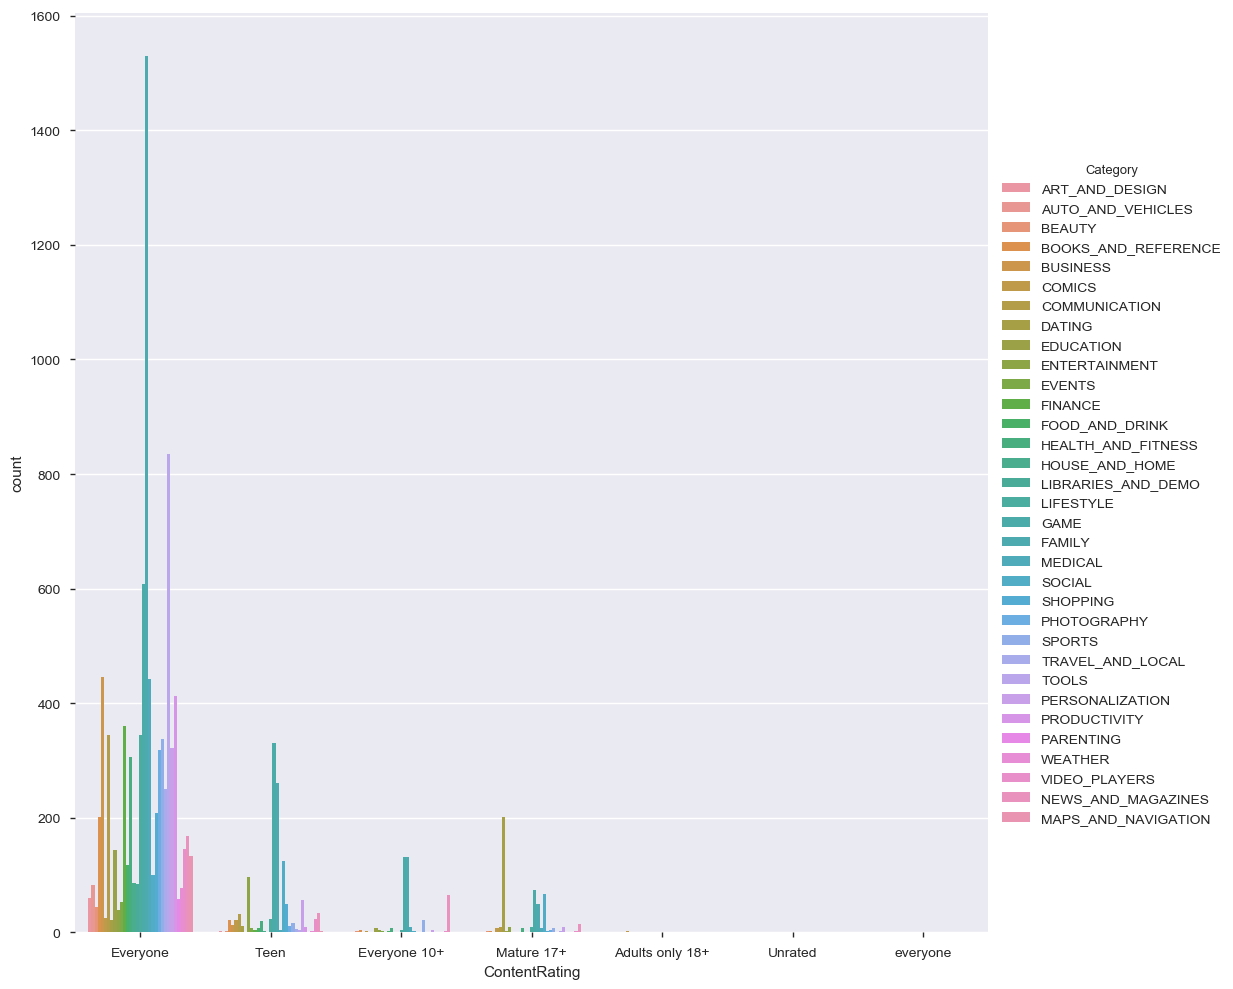

In [20]:
sns.factorplot('ContentRating', hue='Category', kind='count',size=10, data=googleplay_df);

### 4.6 Information on the highest rated app.

Below is the details of the Highest Rating App.

In [22]:
googleplay_df.loc[googleplay_df['Rating'].idxmax()]

App              Hojiboy Tojiboyev Life Hacks
Category                               COMICS
Rating                                      5
Reviews                                    15
Size                                      37M
Installs                               1,000+
Type                                     Free
Price                                       0
ContentRating                        Everyone
Genres                                 Comics
LastUpdated                     June 26, 2018
CurrentVer                                  2
AndroidVer                       4.0.3 and up
Name: 329, dtype: object

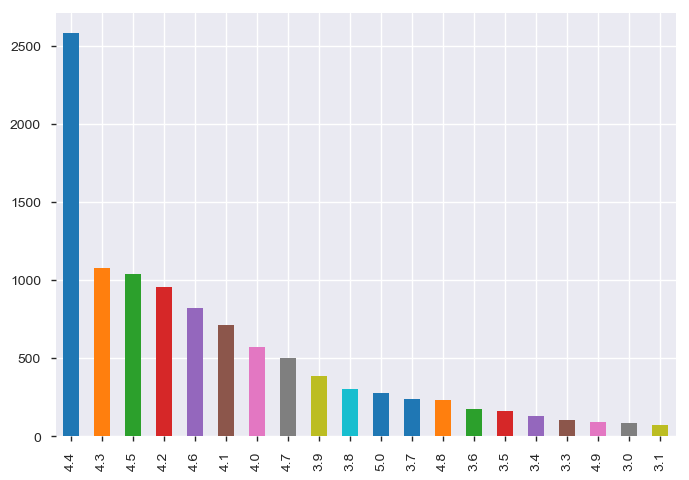

In [23]:
googleplay_df['Rating'].value_counts().head(20).plot.bar()

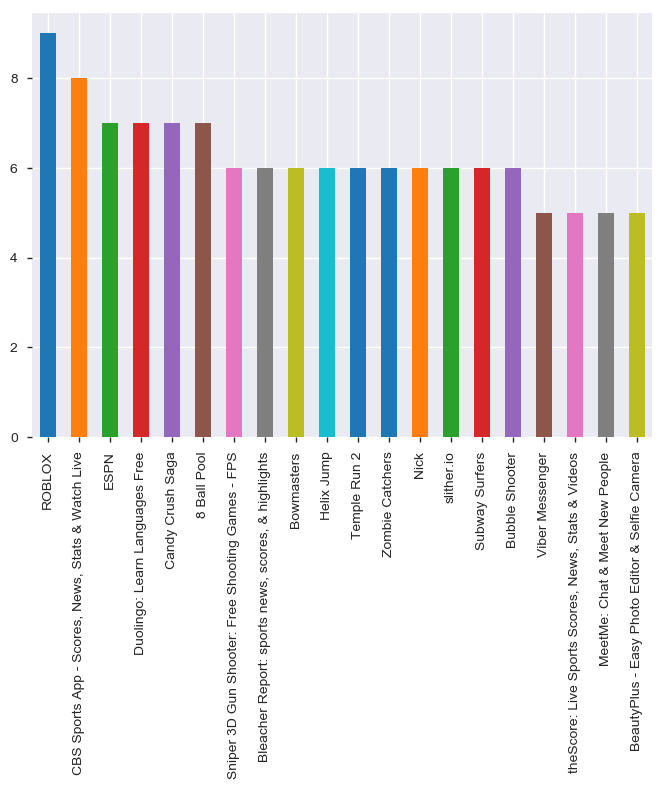

In [24]:
googleplay_df['App'].value_counts().head(20).plot.bar()

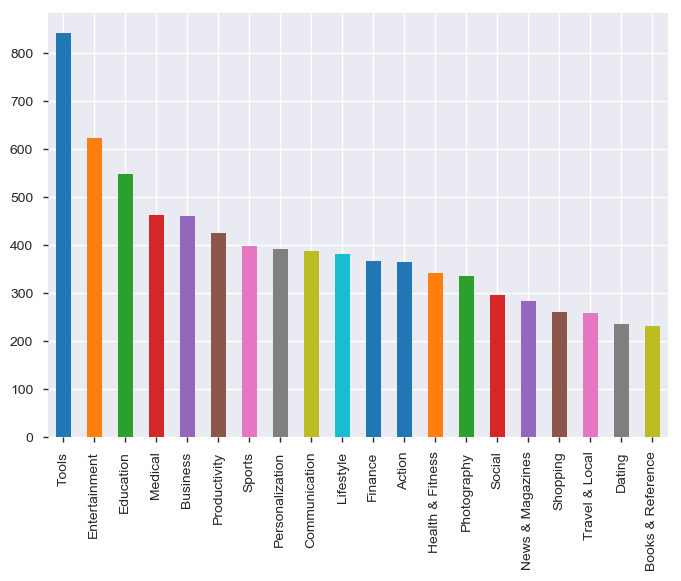

In [25]:
googleplay_df['Genres'].value_counts().head(20).plot.bar()

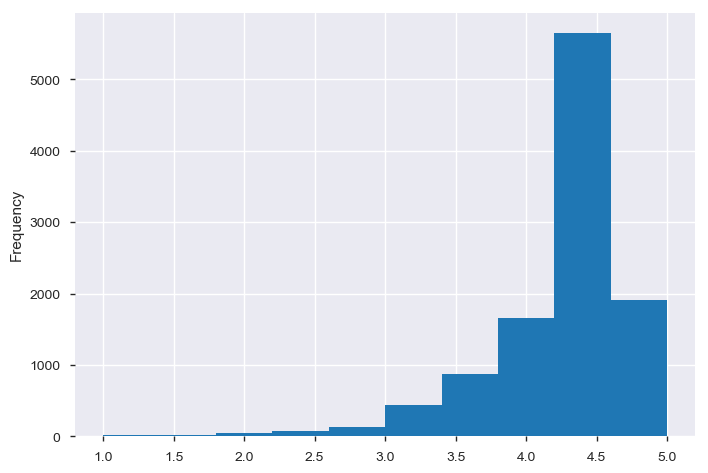

In [26]:
googleplay_df['Rating'].plot.hist()

In [27]:
googleplay_df[googleplay_df['Type'] =='Paid']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
478,Truth or Dare Pro,DATING,4.4,0,20M,50+,Paid,$1.49,Teen,Dating,"September 1, 2017",1,4.0 and up
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,4.4,0,18k,100+,Paid,$2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0 and up
480,Ad Blocker for SayHi,DATING,4.4,4,1.2M,100+,Paid,$3.99,Teen,Dating,"August 2, 2018",1.2,4.0.3 and up


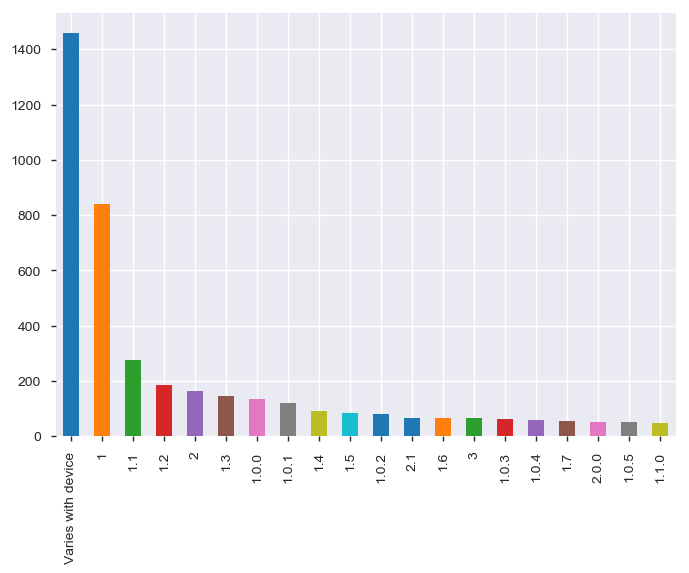

In [28]:
googleplay_df['CurrentVer'].value_counts().head(20).plot.bar()

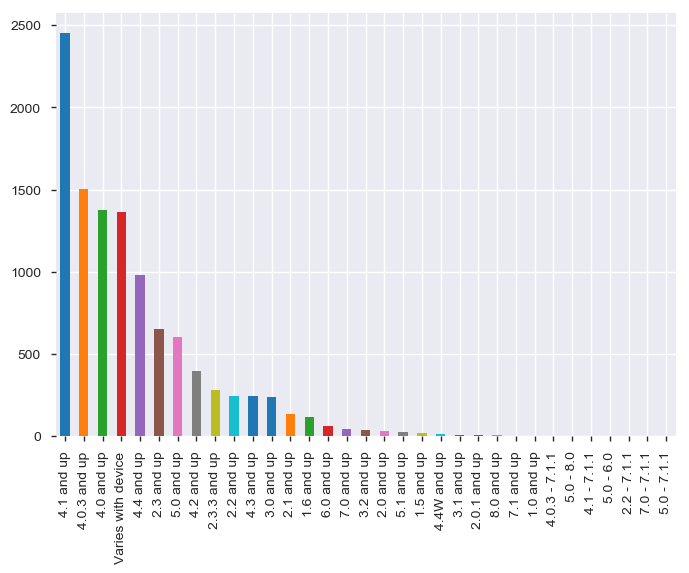

In [29]:
googleplay_df['AndroidVer'].value_counts().plot.bar()

<a id=section407></a>

In [46]:
for i in range(1,5,1):
        googleplay_df.loc[googleplay_df['Rating'] <= i*10, 'Rating_bin'] = i

In [43]:
print(googleplay_df[['Rating' , 'Rating_bin']].tail(400))

       Rating  Rating_bin
10441     4.1         4.0
10442     4.8         4.0
10443     4.6         4.0
10444     4.4         4.0
10445     3.8         4.0
10446     3.7         4.0
10447     4.2         4.0
10448     3.7         4.0
10449     4.3         4.0
10450     4.5         4.0
10451     3.5         4.0
10452     4.0         4.0
10453     4.5         4.0
10454     2.9         4.0
10455     3.9         4.0
10456     3.6         4.0
10457     4.6         4.0
10458     2.1         4.0
10459     4.7         4.0
10460     4.5         4.0
10461     4.1         4.0
10462     4.5         4.0
10463     3.7         4.0
10464     2.9         4.0
10465     4.0         4.0
10466     4.2         4.0
10467     3.7         4.0
10468     3.6         4.0
10469     3.9         4.0
10470     3.4         4.0
...       ...         ...
10811     4.4         4.0
10812     4.1         4.0
10813     4.4         4.0
10814     4.0         4.0
10815     4.2         4.0
10816     4.4         4.0
10817     4.

<a id=section409></a>

## 5. Conclusion 

Category family has more number of apps.<br>
Even though Game category apps are lesser in counts compared to family category, it is mostly downloaded category in android playstore market.<br>
Rating of the apps in the game category is mostly above 4.0.<br>
Most of the apps in the playstore are designed for every age groups.<br> Interestingly, there are very few adult apps based on this dataset.<br>
Device running with minimum android version 4.1 will have more number of apps for it in the playstore. <br>Even it has more games.<br>
Higher sized apps are downloaded most than lower sized apps. Because games are downloaded most which is obviously has higher sizes.<br>
Most apps can be downloaded free of cost.<br>
Most installed apps have most reviews.<br>
Category Game has most installed since most installed apps likely to get more reviews. <br> Henceforth if app related to game is launched in the market, it will be more likely to be successful.<br>
Machine learning model can be applied to predict app rating, reviews. 